In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer

In [2]:
tags = [
    # Climate Change
    "Climate change", "Global warming", "Carbon emissions", "Renewable energy",
    "Rising sea levels", "Carbon footprints", "Forests", "Melting icebergs",
    "Sustainable living",

    # Technology
    "Quantum computing", "iPhone", "Self-driving cars",
    "Cybersecurity", "Virtual reality", "Big data", "Cloud computing",
    "Blockchain", "5G networks",

    # Fitness
    "Running", "Protein intake", "Muscle Recovery",
    "Weightlifting", "Yoga", "Hydration",
    "Fitness", "Recovery time"
]




In [3]:
model = SentenceTransformer("all-mpnet-base-v2")
embeddings = model.encode(tags)
print(embeddings)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[[ 0.02847473  0.02140894  0.00829057 ...  0.00953    -0.01332007
   0.00714701]
 [ 0.03299236  0.03067479  0.01806517 ...  0.00038369 -0.00569034
   0.00087668]
 [ 0.03698249  0.04880301  0.00598878 ... -0.02874716 -0.04047183
  -0.02026892]
 ...
 [-0.009602   -0.08546422  0.00692401 ...  0.0165219  -0.02017107
  -0.00454382]
 [ 0.00141917 -0.00377841  0.01895475 ...  0.03939537 -0.01580387
   0.00300574]
 [-0.01883922  0.0496226  -0.04066845 ... -0.05342234 -0.06529355
  -0.04290815]]


In [13]:
# Perform kmean clustering
num_clusters = 3
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(embeddings[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i + 1)
    print("Embeddings:",cluster)
    print("Tags:", tags[i]) # Print the tags

    print("")

Streaming output truncated to the last 5000 lines.
        6.51281420e-03,  6.36525452e-02, -9.01647843e-03,  5.83371567e-03,
        1.99338775e-02, -2.63666287e-02,  1.79361906e-02,  3.36265080e-02,
       -4.84039374e-02, -2.37462553e-03, -1.80374291e-02, -1.80008002e-02,
        2.19617039e-02,  7.00557306e-02,  4.83681038e-02, -3.45796607e-02,
       -6.32790290e-03,  3.42883766e-02, -8.47741887e-02,  8.52432940e-03,
        2.66658645e-02, -2.91356985e-02,  1.32587559e-06, -2.28276793e-02,
       -6.53618062e-03,  3.49090584e-02, -1.47629681e-03,  1.05447255e-01,
       -8.17730203e-02, -1.47324270e-02, -5.89610869e-03, -3.10155898e-02,
        5.96498698e-02,  3.92229408e-02,  4.10076836e-03,  1.58415493e-02,
       -1.92890801e-02, -1.74316969e-02,  8.10819119e-03, -9.06757824e-03,
        3.75154912e-02,  9.15613770e-03, -6.06640056e-03,  1.96975321e-02,
       -7.55691295e-03,  1.29631851e-02, -1.44664515e-02,  4.25812192e-02,
        4.32288647e-02, -9.39406746e-04,  6.18186

In [7]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

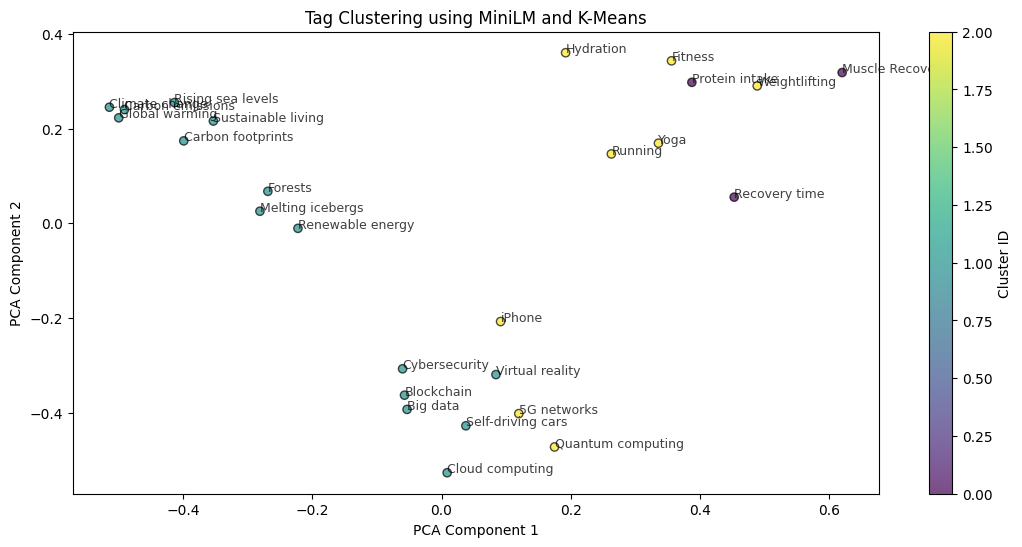

In [21]:
# Visualize the clusters
plt.figure(figsize=(13, 6))
scatter = plt.scatter(
    reduced_embeddings[:, 0], reduced_embeddings[:, 1],
    c=cluster_assignment, cmap="viridis", alpha=0.7, edgecolors="k"
)


# Annotate points with the tag
for i, phrase in enumerate(tags):
    plt.annotate(phrase, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=9, alpha=0.75)

# for i in enumerate(tags):
#     plt.annotate((reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=9, alpha=0.75)

plt.colorbar(scatter, label="Cluster ID")
# plt.colorbar(scatter)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Tag Clustering using MiniLM and K-Means")
plt.show()